In [151]:
import pandas as pd
import numpy as np

df = pd.read_excel('24MAG_HW_1_v17.xls')
df = df.where(pd.notnull(df), None)

df.columns = [
    'Возраст (лет)',
    'Количество иждивенцев',
    'Доход (руб./мес.)',
    'Срок проживания в регионе (лет)',
    'Оценка автомобиля заемщика (USD)',
    'Размер кредита (тыс. руб.)'
]

print(df)

    Возраст (лет)  Количество иждивенцев  Доход (руб./мес.)  \
0            49.0                    3.0            14900.0   
1            21.0                    3.0             8200.0   
2            35.0                    2.0            29400.0   
3            32.0                    2.0                NaN   
4            32.0                    1.0            27000.0   
5             NaN                    2.0            29000.0   
6            45.0                    3.0            38600.0   
7            31.0                    NaN            18200.0   
8            41.0                    2.0            26100.0   
9            31.0                    1.0            16200.0   
10           27.0                    0.0            20200.0   
11           31.0                    1.0            25400.0   
12           43.0                    2.0            10900.0   
13           50.0                    3.0            17500.0   
14           46.0                    3.0            160

In [152]:
df = df.interpolate()

In [153]:
df.mean()

,0
Возраст (лет),39.383721
Количество иждивенцев,2.000000
Доход (руб./мес.),19205.813953
Срок проживания в регионе (лет),10.325581
Оценка автомобиля заемщика (USD),21279.069767
Размер кредита (тыс. руб.),197500.000000


In [154]:
df.std()

,0
Возраст (лет),8.849157
Количество иждивенцев,0.994030
Доход (руб./мес.),9453.723185
Срок проживания в регионе (лет),4.935155
Оценка автомобиля заемщика (USD),10894.134685
Размер кредита (тыс. руб.),95932.329820


In [155]:
df.median()

,0
Возраст (лет),40.0
Количество иждивенцев,2.0
Доход (руб./мес.),20200.0
Срок проживания в регионе (лет),10.0
Оценка автомобиля заемщика (USD),21000.0
Размер кредита (тыс. руб.),200000.0


In [156]:
df.quantile([0.25, 0.5, 0.75])

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0.25,32.0,1.0,13900.0,6.0,15500.0,149000.0
0.50,40.0,2.0,20200.0,10.0,21000.0,200000.0
0.75,44.5,3.0,26600.0,13.0,26500.0,262500.0


<Axes: >

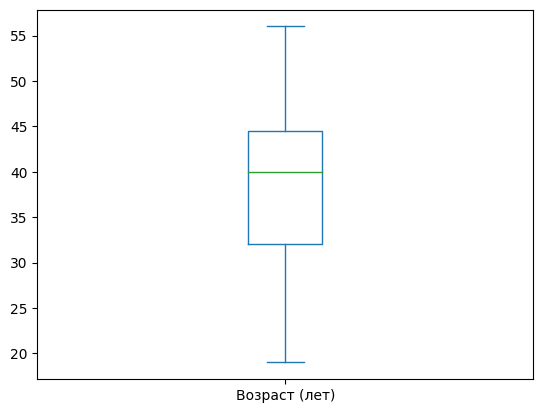

In [157]:
df['Возраст (лет)'].plot(kind='box')

<Axes: >

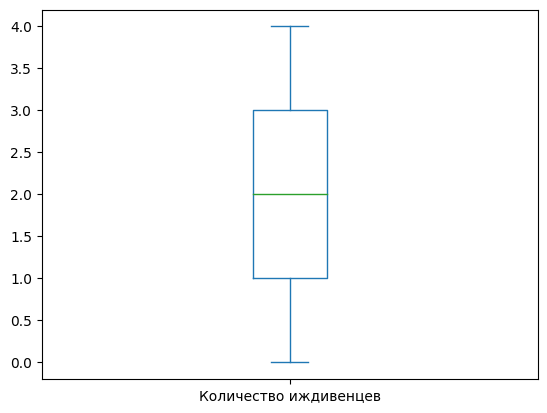

In [158]:
df['Количество иждивенцев'].plot(kind='box')

<Axes: >

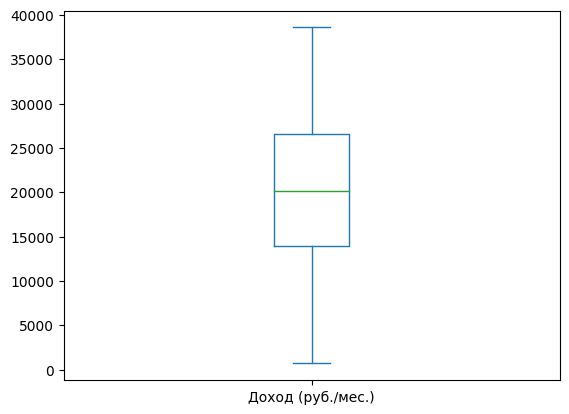

In [159]:
df['Доход (руб./мес.)'].plot(kind='box')

<Axes: >

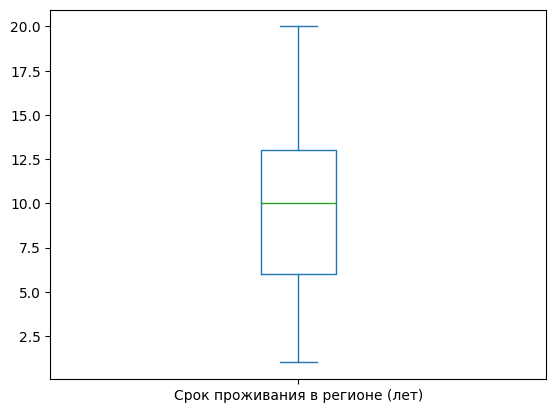

In [160]:
df['Срок проживания в регионе (лет)'].plot(kind='box')

<Axes: >

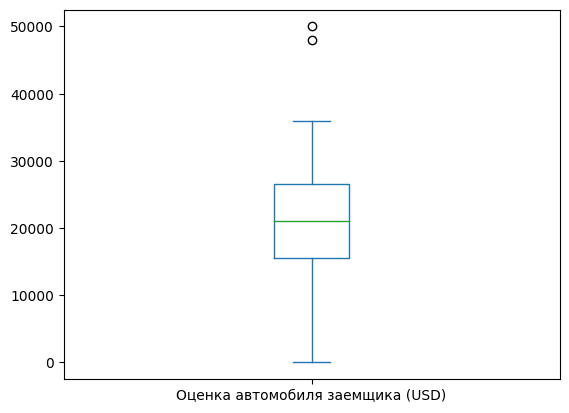

In [161]:
df['Оценка автомобиля заемщика (USD)'].plot(kind='box')

<Axes: >

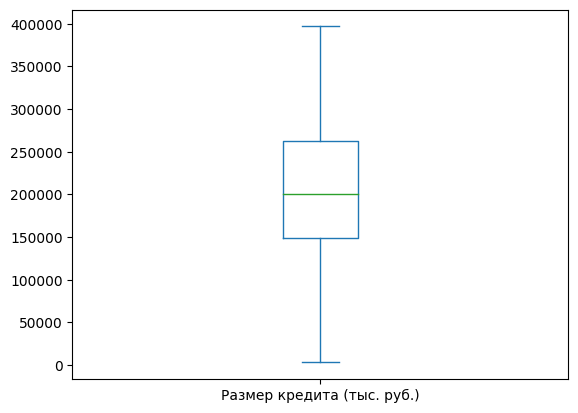

In [162]:
df['Размер кредита (тыс. руб.)'].plot(kind='box')

In [163]:
df = df[df['Оценка автомобиля заемщика (USD)'] < 40000]

<Axes: >

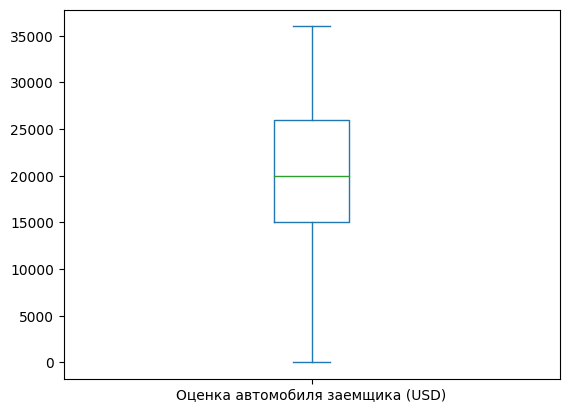

In [164]:
df['Оценка автомобиля заемщика (USD)'].plot(kind='box')

In [165]:
df = df[df['Оценка автомобиля заемщика (USD)'] > 5000]

<Axes: >

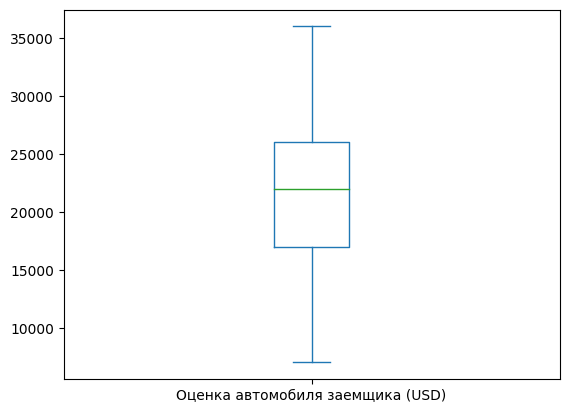

In [166]:
df['Оценка автомобиля заемщика (USD)'].plot(kind='box')

<Axes: >

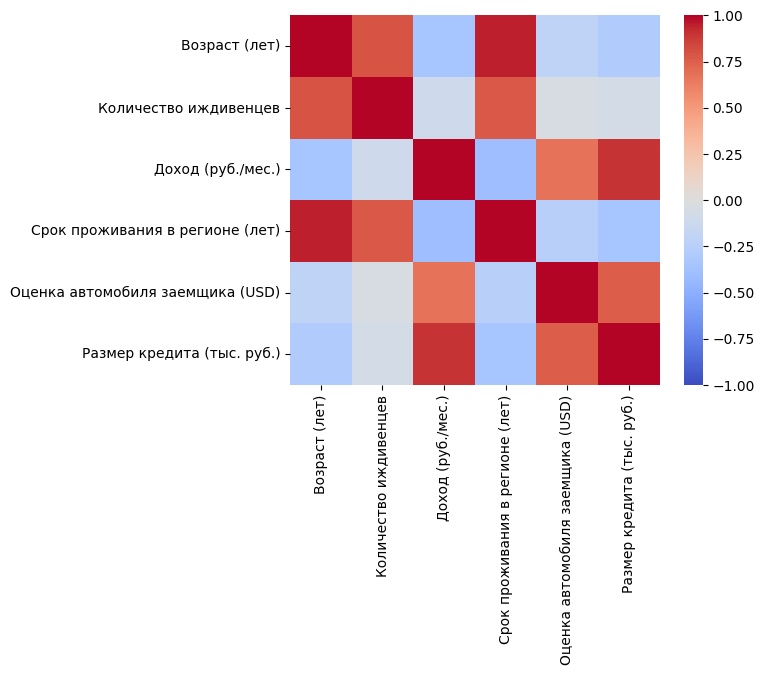

In [167]:
import seaborn as sns

corr_mat = df.corr()
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

array([[<Axes: title={'center': 'Возраст (лет)'}>,
        <Axes: title={'center': 'Количество иждивенцев'}>],
       [<Axes: title={'center': 'Доход (руб./мес.)'}>,
        <Axes: title={'center': 'Срок проживания в регионе (лет)'}>],
       [<Axes: title={'center': 'Оценка автомобиля заемщика (USD)'}>,
        <Axes: title={'center': 'Размер кредита (тыс. руб.)'}>]],
      dtype=object)

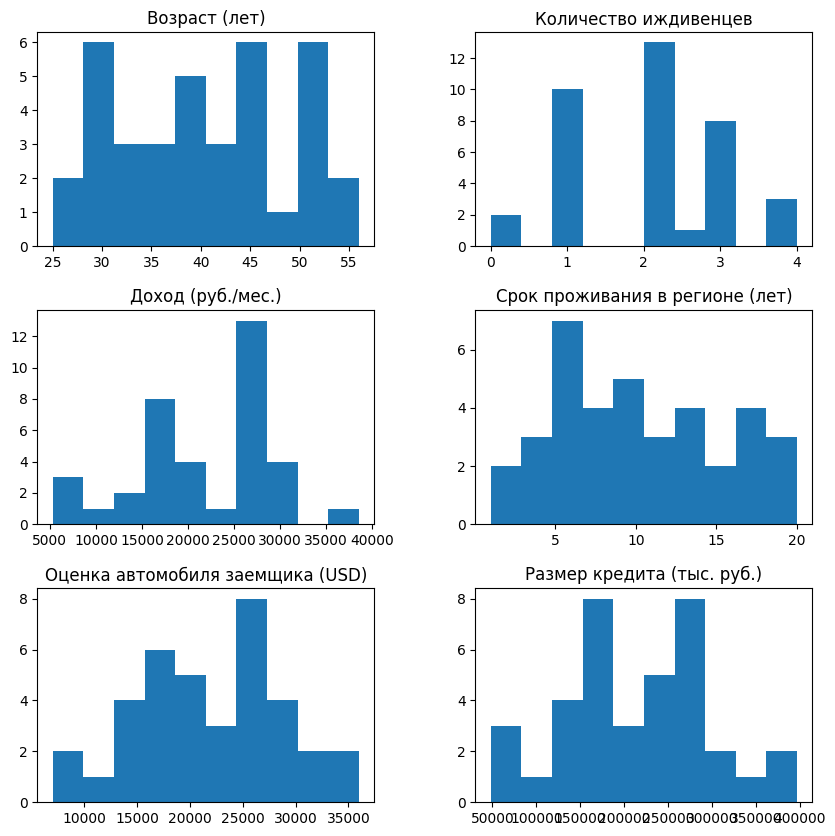

In [168]:
df.hist(bins=10, figsize=(10, 10), grid=False)

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
Z = scaler.fit_transform(df)

Z_df = pd.DataFrame(Z, columns=df.columns)

In [170]:
from sklearn.preprocessing import normalize
Z_norm = normalize(Z_df, axis=0, norm="l2")

In [175]:
U, S, VT = np.linalg.svd(Z_norm)

In [178]:
L, W = np.linalg.eig(Z_norm.T@Z_norm)

In [179]:
L

array([3.3456437 , 1.95343741, 0.35336735, 0.20923097, 0.05089927,
       0.08742129])